In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("/content/Zoo.csv")
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


(101, 18)

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


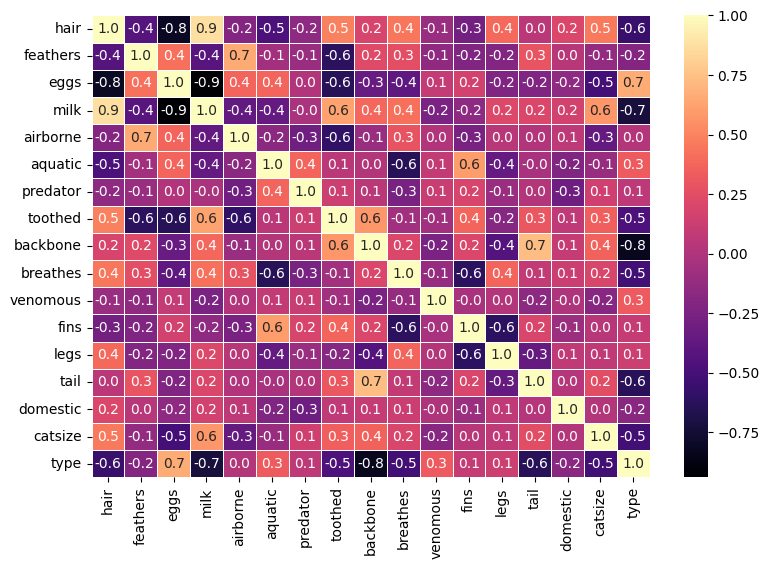

In [4]:
#EDA
plt.figure(figsize = (9, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt='.1f',linewidths=0.5)
plt.show()

Text(0.5, 1.0, 'Boxplots')

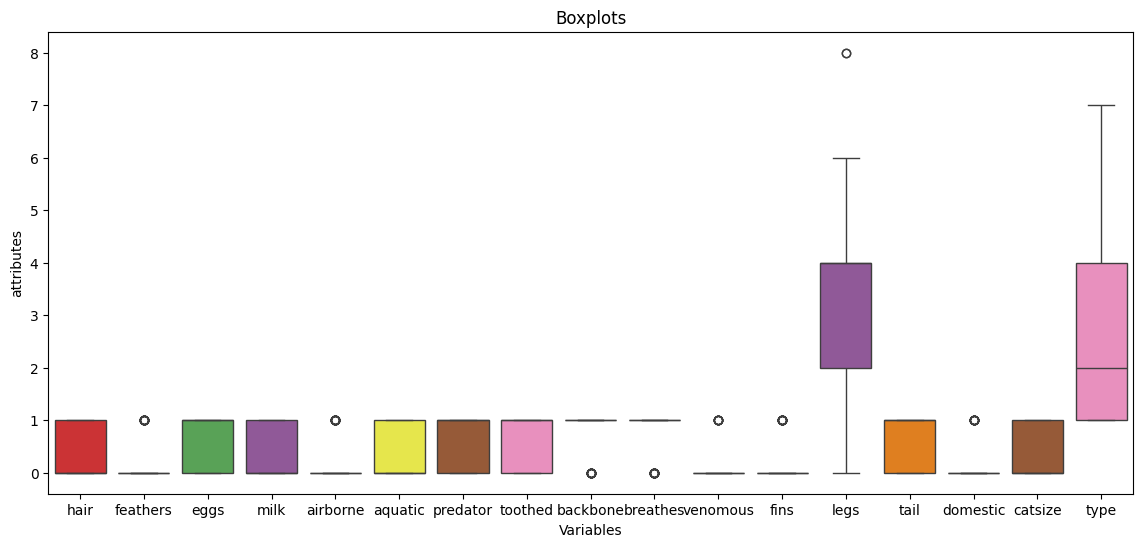

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, orient='v', palette='Set1')
plt.xlabel('Variables')
plt.ylabel('attributes')
plt.title('Boxplots')

array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>],
       [<Axes: title={'center': 'type'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1400x600 with 0 Axes>

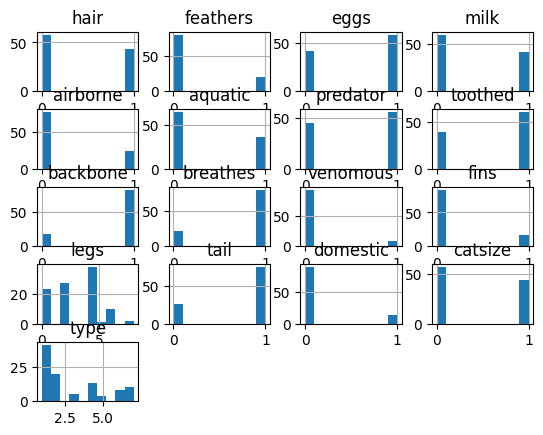

In [6]:
plt.figure(figsize=(14, 6))
df.hist()

In [7]:
#Data Spliting
X=df.iloc[:,1:17]
Y=df[["type"]]


In [8]:
#Data Partition
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.986
0.935


In [9]:
# validation set method --> validaton hold-off method
knn = KNeighborsClassifier(n_neighbors=1)

training_accuracy = []
test_accuracy = []

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y.values.ravel(), test_size=0.30, random_state=i)
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))


Average trianing accuray 1.0
Average test accuray 0.96


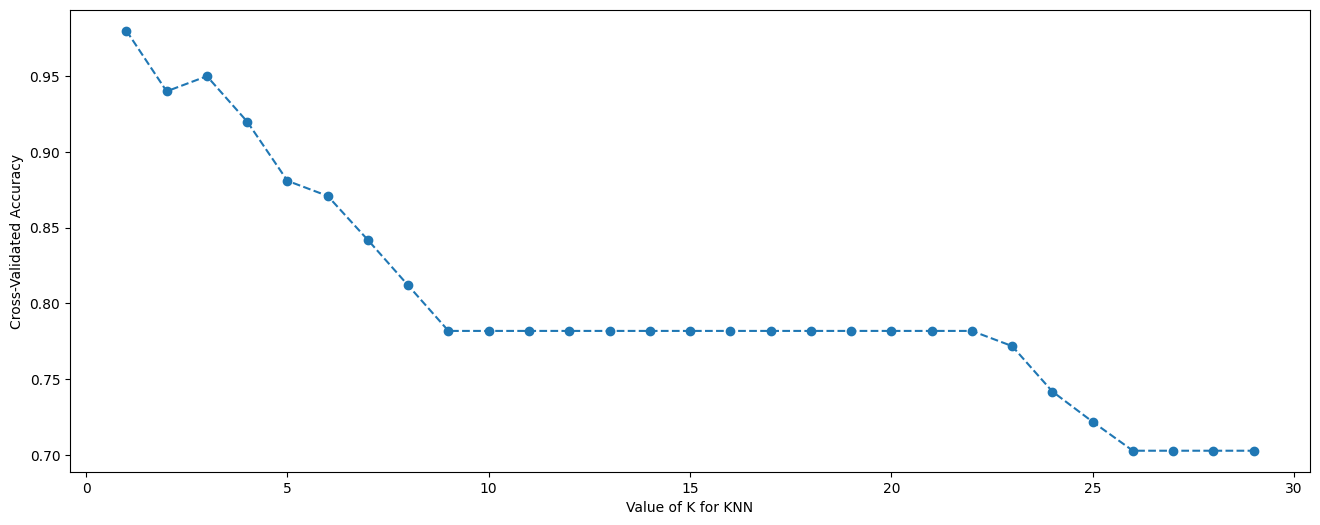

In [10]:
#Visualizing the CRoss Validation results
k_range = range(1, 30)
k_scores = []

from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X, Y.values.ravel(), cv=10)
    k_scores.append(scores.mean())

plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores,linestyle='dashed',marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


In [11]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,30),
                            'Accuracy' : k_scores})
zoo_accuracy.sort_values('Accuracy', ascending = False)
zoo_accuracy

,Value of k,Accuracy
0,1,0.980000
1,2,0.940000
2,3,0.950000
3,4,0.920000
4,5,0.880909
5,6,0.870909
6,7,0.841818
7,8,0.811818
8,9,0.781818
9,10,0.781818


In [12]:
#Inference:
#The validation hold-off method using k-nearest neighbors (KNN) demonstrates a consistent and positive outcome.
#With an average training accuracy of 100% and an average test accuracy of 96% over 100 random splits,
#the model appears to generalize well to unseen data. This suggests that the chosen hyperparameters for the KNN classifier,
#specifically the number of neighbors (k=5), result in a balanced model with a satisfactory level of accuracy on both the training and test datasets.
